#### 'winequality-red.csv' -> 와인에 대한 정보와(x), 품질(y)이 나와있는 데이터 셋입니다. 

### Q1. 'quality'라는 변수에서 일정한 기준을 잡아 와인의 quality를 'Good'과 'Bad'로 나누어 보세요. (ex) quality가 x이상이면 'good', x미만이면 'bad')

### Q2. 데이터를 훈련세트와 테스트 세트로 분리하여, DecisionTree 모델로 학습시켜보세요.

### Q3. RandomForest 모델을 학습해보면서, GridSearch를 이용해 BestParameter를 찾아보세요.

### Q4. Voting과 Bagging의 차이점을 간략하게 적어주세요.

## Q1.  Q1. 'quality'라는 변수에서 일정한 기준을 잡아 와인의 quality를 'Good'과 'Bad'로 나누어 보세요. (ex) quality가 x이상이면 'good', x미만이면 'bad')

In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib in line

UsageError: unrecognized arguments: line


In [8]:
raw_data = pd.read_csv('winequality-red.csv')
raw_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
wine_quality = raw_data['quality']

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

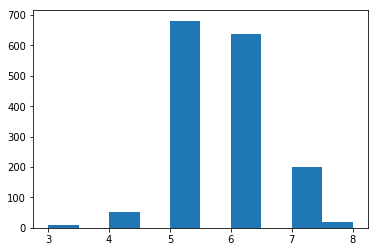

In [10]:
plt.hist(wine_quality)

In [11]:
wine_quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [12]:
raw_data['good_bad'] =  wine_quality.apply(lambda x: 'good' if x >= 6 else 'bad')

In [13]:
raw_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_bad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


In [14]:
raw_data.drop(['good_bad'], axis=1, inplace=True)
raw_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Q2. 데이터를 훈련세트와 테스트 세트로 분리하여, DecisionTree 모델로 학습시켜보세요.

In [15]:
raw_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
label = raw_data['quality']
data = raw_data.drop(['quality'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.3, random_state = 2019)
print(len(X_train), len(X_test), len(y_train), len(y_test))

1119 480 1119 480


In [17]:
dt_clf = DecisionTreeClassifier(random_state=2019)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

## Q3. RandomForest 모델을 학습해보면서, GridSearch를 이용해 BestParameter를 찾아보세요.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [10,50,100],
    'max_depth' : [4,6,8,10,12],
    'min_samples_leaf' : [2,4,8,12,18],
    'min_samples_split' : [4,8,16,20],
    'max_features' : [2,4,6,8]
}

rf_clf = RandomForestClassifier(random_state = 2019)
grid_rf_clf = GridSearchCV(rf_clf, param_grid=params, scoring='accuracy', cv=3)
grid_rf_clf.fit(X_train, y_train)


In [ ]:
grid_rf_clf.best_params_

## Q4. Voting과 Bagging의 차이점을 간략하게 적어주세요.

In [ ]:
# 보팅은 서로 다른 알고리즘을 가진 분류기를 결합하고 
# 배깅은 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행하여 보팅을 수행하는 것